1- Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
- Percentiles 25, 75
- Rango Intercualtílico
- Boxplot de algunas variables
- Tabla de frecuencias
    - Variables cualitativas
    - Variables cuantitativas
    - Frecuencia acumulada
    - Representación de al menos una tabla de frecuencias


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

La base de datos que hemos seleccionado es el dataset de Sephora, dejamos el link a mano para poder consultar las descripciones de las columnas
https://www.kaggle.com/datasets/raghadalharbi/all-products-available-on-sephora-website?resource=download

In [4]:
df = pd.read_csv('../datos/sephora_website_dataset.csv')
df.head(2)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0


In [5]:
#Media, mediana, moda, máximo y mínimo del precio

print ('Media precio:', df['price'].mean().round(2))
print ('Mediana precio:', df['price'].median())
print ('Moda precio:', df['price'].mode()[0])
print ('Max precio:', df['price'].max())
print ('Min precio:', df['price'].min())


Media precio: 50.06
Mediana precio: 35.0
Moda precio: 25.0
Max precio: 549.0
Min precio: 2.0


In [6]:
# Percentiles y rango intercuartilico precio

q1_precio = np.nanpercentile(df['price'], 25)
q3_precio = np.nanpercentile(df['price'], 75)

print('El percentil 25:', q1_precio)
print('El percentil 75:', q3_precio)
print('Rango intercuartílico: ', q3_precio - q1_precio )

El percentil 25: 24.0
El percentil 75: 59.0
Rango intercuartílico:  35.0


Podemos ver como el 25% de los precios son menores a 24€ y el 75% de los precios esta por debajo de los 59€, es decir hay un 25% de productos por encima de 59€.
Con el rango intercuartílico podemos ver que la mayoría de los productos están entre los 24 y los 59 euros, teniendo una diferencia de 35€.
Si comparamos estos percentiles con la media, podemos ver como la media es cercana al percentil 75, es basntante elevada mientras que la mediana es más representativa al encontrarse más cercana a este conjunto de datos.

In [7]:
#Media, mediana, moda, máximo y mínimo del valor

print ('Media valor:', df['value_price'].mean().round(2))
print ('Mediana valor:', df['value_price'].median())
print ('Moda valor:', df['value_price'].mode()[0])
print ('Max valor:', df['value_price'].max())
print ('Min valor:', df['value_price'].min())


Media valor: 51.82
Mediana valor: 35.0
Moda valor: 30.0
Max valor: 549.0
Min valor: 2.0


In [8]:
# Percentiles y rango intercuartilico valor

q1_valor = np.nanpercentile(df['value_price'], 25)
q3_valor = np.nanpercentile(df['value_price'], 75)

print('El percentil 25:', q1_valor)
print('El percentil 75:', q3_valor)
print('Rango intercuartílico: ', q3_valor - q1_valor )

El percentil 25: 25.0
El percentil 75: 60.0
Rango intercuartílico:  35.0


En los valores de los precios el resultado es muy similar al de los precios.

In [9]:
#Media, mediana, moda, máximo y mínimo del rating
print ('Media rating:', df['rating'].mean().round(2))
print ('Mediana rating:', df['rating'].median())
print ('Moda rating:', df['rating'].mode()[0])
print ('Max rating:', df['rating'].max())
print ('Min rating:', df['rating'].min())


Media rating: 3.99
Mediana rating: 4.0
Moda rating: 4.5
Max rating: 5.0
Min rating: 0.0


In [10]:
# Percentiles y rango intercuartilico rating

q1_rating = np.nanpercentile(df['rating'], 25)
q3_rating = np.nanpercentile(df['rating'], 75)

print('El percentil 25:', q1_rating)
print('El percentil 75:', q3_rating)
print('Rango intercuartílico: ', q3_rating - q1_rating )

El percentil 25: 4.0
El percentil 75: 4.5
Rango intercuartílico:  0.5


En el rating tenemos el caso completamente contrario. El 25% de los valores están por debajo de 4 y solo el 25% por encima de 4.5, con lo cual la mayoría de los valores solo distan en 0.5 puntos. 
Si comparamos la media está por debajo del percentil 25 con lo que podemos concluir que hay muchos outliers bajos.

### Boxplot

---

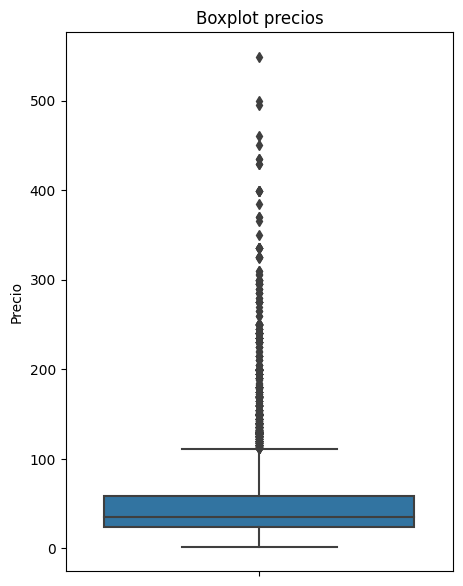

In [11]:
plt.figure(figsize=(5,7))

fig = sns.boxplot(y=df['price'])

fig.set(ylabel='Precio')

fig.set_title('Boxplot precios');


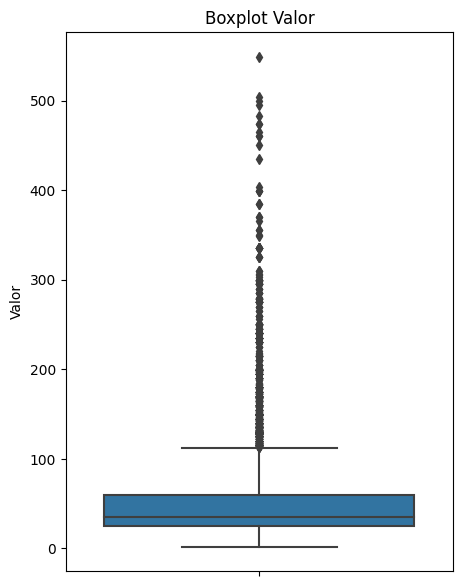

In [12]:
plt.figure(figsize=(5,7))

fig = sns.boxplot(y=df['value_price'])

fig.set(ylabel='Valor')

fig.set_title('Boxplot Valor');

En el caso del precio y el valor vemos gráficos muy similares. Si bien la mayoría de los valores se encuentran concentrados en la caja entre 25 y 60 euros aprox. Podemos ver muchos valores atípicos que distan mucho del bigote superior del boxplot. Esto implica que la mayoria de los productos están en un rango de precio similiar mientras que hay algunos productos de alta gama que aumentan el precio medio. Con lo cual podemos concluir que Sephora es una tienda que tiene productos para todo tipo de "bolsillos" pero más dirigido a productos de gama media.

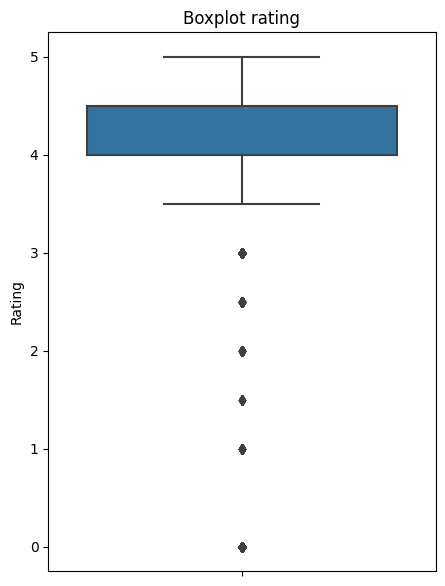

In [13]:
plt.figure(figsize=(5,7))

fig = sns.boxplot(y=df['rating'])

fig.set(ylabel='Rating')

fig.set_title('Boxplot rating');

Respecto a las valoraciones vemos el boxplot en la parte superior ya que la mayoría de las valoraciones son altas. Hay ciertos valores atipicos por debajo de 3 puntos que desvirtuan la media. Podemos conluir que la mayoría de los producstos de Sephora tienen muy buenas valoraciones y que la mayoría de los consumidores valoran sus productos en la web.

### Tabla de frecuencias

---

In [14]:
# Variable cuantitativa -- Marca
df_marca = df.groupby("brand").count().reset_index().sort_values(by = "id", ascending = False)
df_marca

,brand,id,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
232,SEPHORA COLLECTION,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496
38,CLINIQUE,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234
322,tarte,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
262,TOM FORD,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161
69,Dior,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,MDSolarSciences,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
233,SHHHOWERCAP,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
274,Too Cool For School,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
273,TokyoMilk,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


En esta tabla de frecuencias podemos ver la cantidad de productos que hay por cada marca, podemos ver como SEPHORA COLLECTION, su propia marca, tiene casi 500 productos, lo cual es muy representativo.

In [15]:
# Variable cuantitativa -- Categorías
df_categoria = df.groupby("category").count().reset_index().sort_values(by = "id", ascending = False)
df_categoria

,category,id,brand,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
119,Perfume,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665
116,Moisturizers,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451
58,Face Serums,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384
140,Value & Gift Sets,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378
62,Face Wash & Cleansers,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Hair Thinning & Hair Loss,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
88,High Tech Tools,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
92,Lid Shadow Brush,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
102,Lip Treatments,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Podemos ver que el mayor producto vendido en su web es el perfume  y las cremas hidratantes seguido de los serums faciales y sets de regalos. Podemos deducir que mucha gente puede comprar productos para regalar ya que los perfumes son muy vendidos como regalo también.

In [16]:
# Creamos una nueva columna con la frecuencia acumulada
df_categoria['frec_acum'] = df_categoria['id'].cumsum()
df_categoria

,category,id,brand,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,frec_acum
119,Perfume,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665
116,Moisturizers,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,1116
58,Face Serums,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,1500
140,Value & Gift Sets,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,1878
62,Face Wash & Cleansers,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,2125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Hair Thinning & Hair Loss,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,9164
88,High Tech Tools,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,9165
92,Lid Shadow Brush,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,9166
102,Lip Treatments,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,9167


In [17]:
# Variable cuantitativa -- Me gustas (love)
df_love = df.groupby("love").count().reset_index().sort_values(by = "love", ascending = False)
df_love

,love,id,brand,category,name,size,rating,number_of_reviews,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
1682,1300000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1681,770700,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1680,660000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1679,657100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1678,646600,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,17,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [18]:
df[df['love']== 1300000]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
4602,1890623,KVD Vegan Beauty,Lipstick,Everlasting Liquid Lipstick,0.22 oz/ 6.6 mL,4.5,14000,1300000,21.0,21.0,https://www.sephora.com/product/everlasting-lo...,True,exclusive,no options,What it is: A long-wear- high-pigment liquid l...,Suggested Usage:-For precise definition- line ...,Isododecane- Caprylic/Capric Triglyceride- Dis...,0,1,0,0


In [19]:
df[df['love']== 770700]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
5837,2172310,NARS,Concealer,Radiant Creamy Concealer,0.22 oz/ 6 mL,4.5,11000,770700,30.0,30.0,https://www.sephora.com/product/radiant-creamy...,False,0,no options,What it is: An award-winning concealer that c...,Suggested Usage:-Apply directly from the appli...,Water/Aqua/Eau- Dimethicone- Hydrogenated Poly...,0,0,0,0


Hay un producto que destaca especialmente en me gustas, que es un pintalabios de KVD Vegan Beauty, con la mitad de likes podemos encontrar un corrector de la marca NARS pero llama la atención el gran número de likes del primer producto que se puede deber a que es un producto que se hizo viral en redes sociales por ser de la marca de una influercer de EEUU. 

In [20]:
# Variable cuantitativa -- Precio
df_precio = df.groupby("price").count().reset_index().sort_values(by = "id", ascending = False)
df_precio

,price,id,brand,category,name,size,rating,number_of_reviews,love,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
73,25.0,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346
78,28.0,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334
83,30.0,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333
81,29.0,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259
72,24.0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,185.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
234,184.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
233,182.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
80,28.9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Como ya sabíamos 25€ era el precio más repetido (es la moda), y después le siguen precios muy cercanos, entre 24 y 30 euros, como ya sabíamos también gracias al boxplot.

In [21]:
# Creamos una nueva columna con la frecuencia acumulada
df_precio['frec_acum'] = df_precio['id'].cumsum()
df_precio

,price,id,brand,category,name,size,rating,number_of_reviews,love,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,frec_acum
73,25.0,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346
78,28.0,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,680
83,30.0,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333,333,1013
81,29.0,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,1272
72,24.0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,185.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,9164
234,184.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,9165
233,182.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,9166
80,28.9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,9167
